Plume parameters

```python
PLUME_PARAMS_DICT = {
    'fruitfly_0.3mps_checkerboard_floor': {
        'max_conc': 194.4013571501637,
        'threshold': 10,
        'ymean': -0.01686711918990497,
        'zmean': -0.024448968890361408,
        'ystd': 0.013907665641150927,
        'zstd': 0.024051865551085332,
    },
    'fruitfly_0.4mps_checkerboard_floor': {
        'max_conc': 526.5611158275608,
        'threshold': 10,
        'ymean': 0.010397528868787908,
        'zmean': 0.021053005635139854,
        'ystd': 0.011163543244851111,
        'zstd': 0.012783432241805101,
    },
    'fruitfly_0.6mps_checkerboard_floor': {
        'max_conc': 470.45545552729538,
        'threshold': 10,
        'ymean': 0.0046019902473019899,
        'zmean': 0.051356187443552505,
        'ystd': 0.0084829247732408405,
        'zstd': -0.0091643524066678372,
    },
    'mosquito_0.4mps_checkerboard_floor': {
        'Q': -0.26618286981003886,
        'u': 0.4,
        'u_star': 0.06745668765535813,
        'alpha_y': -0.066842568000323691,
        'alpha_z': 0.14538827993452938,
        'x_source': -0.64790143304753445,
        'y_source': .003,
        'z_source': .011,
        'bkgd': 400,
        'threshold': 450,
    }
}
```

Concentration-mapping: 526 concentration units = 0.0476% ethanol. Mosquito (CO2) plume already in ppm.

### equation for CO2 plume:
        
$$c(x, y, z) = \cfrac{Qu}{2\pi\alpha_y\alpha_z u_*^2(x - x_s)^2}
\exp\left(-\cfrac{(y - y_s)^2u^2}{2\alpha_y^2u_*^2(x-x_s)^2} -\cfrac{(z - z_s)^2u^2}{2\alpha_z^2u_*^2(x-x_s)^2}\right)$$

### Analysis of distance to plume center vs time

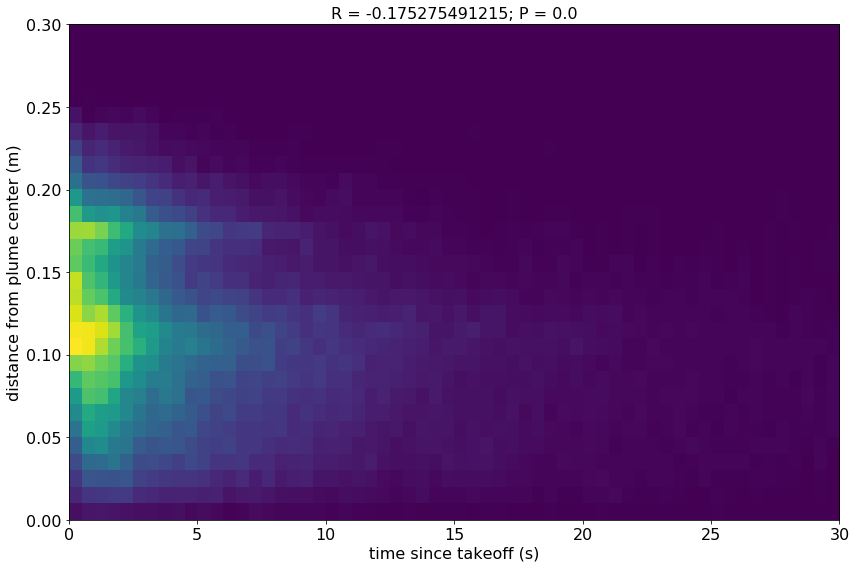

In [15]:
%matplotlib inline
from __future__ import division, print_function
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from db_api import models as d_models
from db_api.connect import session
from plot import set_font_size


def dist_to_plume_center(y, z, y_0, z_0):
    """Return the distance to the plume center over time."""
    
    return np.sqrt((y - y_0)**2 + (z - z_0)**2)


CENTERS = {
    'fruitfly_0.3mps_checkerboard_floor': (-0.0169, -0.0244),
    'fruitfly_0.4mps_checkerboard_floor': (0.0104, 0.0211),
    'fruitfly_0.6mps_checkerboard_floor': (0.0046, 0.0514),
    'mosquito_0.4mps_checkerboard_floor': (0.003, 0.011),
}
DT = 0.01
EXPT = 'fruitfly_0.3mps_checkerboard_floor'
N_TRAJ = 2000

trajs = session.query(d_models.Trajectory).filter_by(
    experiment_id=EXPT, odor_state='on', clean=True).limit(N_TRAJ).all()

ds = []
ts = []

# loop over trajectories
for traj in trajs:
    positions = traj.positions(session)

    y = positions[:, 1]
    z = positions[:, 2]
    
    y_0 = CENTERS[EXPT][0]
    z_0 = CENTERS[EXPT][1]
    
    # get distances to plume center for each time point
    ds_ = dist_to_plume_center(y, z, y_0, z_0)
    
    # get corresponding times from take off
    ts_ = np.arange(0, len(ds_)) * DT
    
    # store distances and corresponding times
    ds.append(ds_)
    ts.append(ts_)
    
ds = np.concatenate(ds)
ts = np.concatenate(ts)

mask = ts >= 0

ds = ds[mask]
ts = ts[mask]

r, p = stats.pearsonr(ts, ds)

# make heatmap
bins_t = np.linspace(0, 30, 61)
bins_d = np.linspace(0, 0.3, 31)

fig, ax = plt.subplots(1, 1, figsize=(12, 8), tight_layout=True)

ax.hist2d(ts, ds, [bins_t, bins_d])

ax.set_xlabel('time since takeoff (s)')
ax.set_ylabel('distance from plume center (m)')
ax.set_title('R = {}; P = {}'.format(r, p))

set_font_size(ax, 16)

### Per-trajectory early vs. late difference analysis

CONNECTED TO WIND TUNNEL PRODUCTION DATABASE
Are you sure you want to connect to the production database [y or n]?y
LOADING DATA FOR CROSSING GROUP: "fruitfly_0.3mps_checkerboard_floor_on_th10.0_chosen0"...
CALCULATING HEADING RESIDUALS...
PRUNING UNPAIRED CROSSINGS...
CROSSING GROUP: "fruitfly_0.3mps_checkerboard_floor_on_th10.0_chosen0"
236 TRAJECTORIES INCLUDING VALID EARLY AND LATE CROSSINGS


/Users/rkp/anaconda/envs/py2/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


LOADING DATA FOR CROSSING GROUP: "fruitfly_0.4mps_checkerboard_floor_on_th10.0_chosen0"...
CALCULATING HEADING RESIDUALS...
PRUNING UNPAIRED CROSSINGS...
CROSSING GROUP: "fruitfly_0.4mps_checkerboard_floor_on_th10.0_chosen0"
294 TRAJECTORIES INCLUDING VALID EARLY AND LATE CROSSINGS
LOADING DATA FOR CROSSING GROUP: "fruitfly_0.6mps_checkerboard_floor_on_th10.0_chosen0"...
CALCULATING HEADING RESIDUALS...
PRUNING UNPAIRED CROSSINGS...
CROSSING GROUP: "fruitfly_0.6mps_checkerboard_floor_on_th10.0_chosen0"
95 TRAJECTORIES INCLUDING VALID EARLY AND LATE CROSSINGS
LOADING DATA FOR CROSSING GROUP: "mosquito_0.4mps_checkerboard_floor_on_th430.0_chosen0"...
CALCULATING HEADING RESIDUALS...
PRUNING UNPAIRED CROSSINGS...
CROSSING GROUP: "mosquito_0.4mps_checkerboard_floor_on_th430.0_chosen0"
42 TRAJECTORIES INCLUDING VALID EARLY AND LATE CROSSINGS


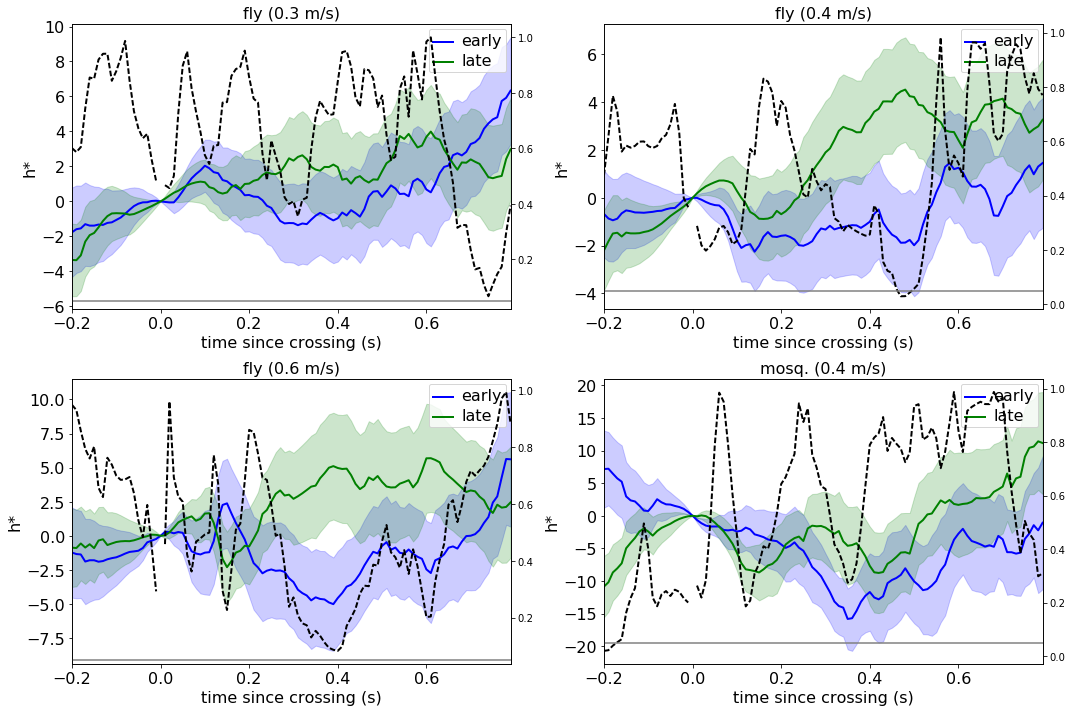

In [1]:
%matplotlib inline
from view.final_figures import per_trajectory_early_late_diff_analysis

per_trajectory_early_late_diff_analysis(
    CROSSING_GROUP_IDS=[
        'fruitfly_0.3mps_checkerboard_floor_on_th10.0_chosen0',
        'fruitfly_0.4mps_checkerboard_floor_on_th10.0_chosen0',
        'fruitfly_0.6mps_checkerboard_floor_on_th10.0_chosen0',
        'mosquito_0.4mps_checkerboard_floor_on_th430.0_chosen0',
    ],
    CROSSING_GROUP_LABELS={
        'fruitfly_0.3mps_checkerboard_floor_on_th10.0_chosen0': 'fly (0.3 m/s)',
        'fruitfly_0.4mps_checkerboard_floor_on_th10.0_chosen0': 'fly (0.4 m/s)',
        'fruitfly_0.6mps_checkerboard_floor_on_th10.0_chosen0': 'fly (0.6 m/s)',
        'mosquito_0.4mps_checkerboard_floor_on_th430.0_chosen0': 'mosq. (0.4 m/s)',
    },
    X_0_MIN=0.,
    X_0_MAX=0.7,
    H_0_MIN=60,
    H_0_MAX=120,
    CROSSING_NUMBER_MAX=5,
    MAX_CROSSINGS_EARLY=2,
    SUBTRACT_INITIAL_HEADING=True,
    T_BEFORE=0.2,
    T_AFTER=0.8,
    ADJUST_NS=True,
    SCATTER_INTEGRATION_WINDOW=[0.4, 0.5],
    AX_SIZE=(7, 5),
    AX_GRID=(2, 2),
    EARLY_LATE_COLORS={'early': 'b', 'late': 'g'},
    ALPHA=0.2,
    P_VAL_COLOR='k',
    P_VAL_Y_LIM=(0, 0.2),
    LEGEND_CROSSING_GROUP_ID='fruitfly_0.6mps_checkerboard_floor_on_th10.0_chosen0',
    FONT_SIZE=16);

LOADING DATA FOR CROSSING GROUP: "fruitfly_0.3mps_checkerboard_floor_on_th10.0_chosen0"...
CALCULATING HEADING RESIDUALS...
PRUNING UNPAIRED CROSSINGS...
CROSSING GROUP: "fruitfly_0.3mps_checkerboard_floor_on_th10.0_chosen0"
1195 TRAJECTORIES INCLUDING VALID EARLY AND LATE CROSSINGS
LOADING DATA FOR CROSSING GROUP: "fruitfly_0.4mps_checkerboard_floor_on_th10.0_chosen0"...
CALCULATING HEADING RESIDUALS...
PRUNING UNPAIRED CROSSINGS...
CROSSING GROUP: "fruitfly_0.4mps_checkerboard_floor_on_th10.0_chosen0"
1284 TRAJECTORIES INCLUDING VALID EARLY AND LATE CROSSINGS
LOADING DATA FOR CROSSING GROUP: "fruitfly_0.6mps_checkerboard_floor_on_th10.0_chosen0"...
CALCULATING HEADING RESIDUALS...
PRUNING UNPAIRED CROSSINGS...
CROSSING GROUP: "fruitfly_0.6mps_checkerboard_floor_on_th10.0_chosen0"
594 TRAJECTORIES INCLUDING VALID EARLY AND LATE CROSSINGS
LOADING DATA FOR CROSSING GROUP: "mosquito_0.4mps_checkerboard_floor_on_th430.0_chosen0"...
CALCULATING HEADING RESIDUALS...
PRUNING UNPAIRED CROSSIN

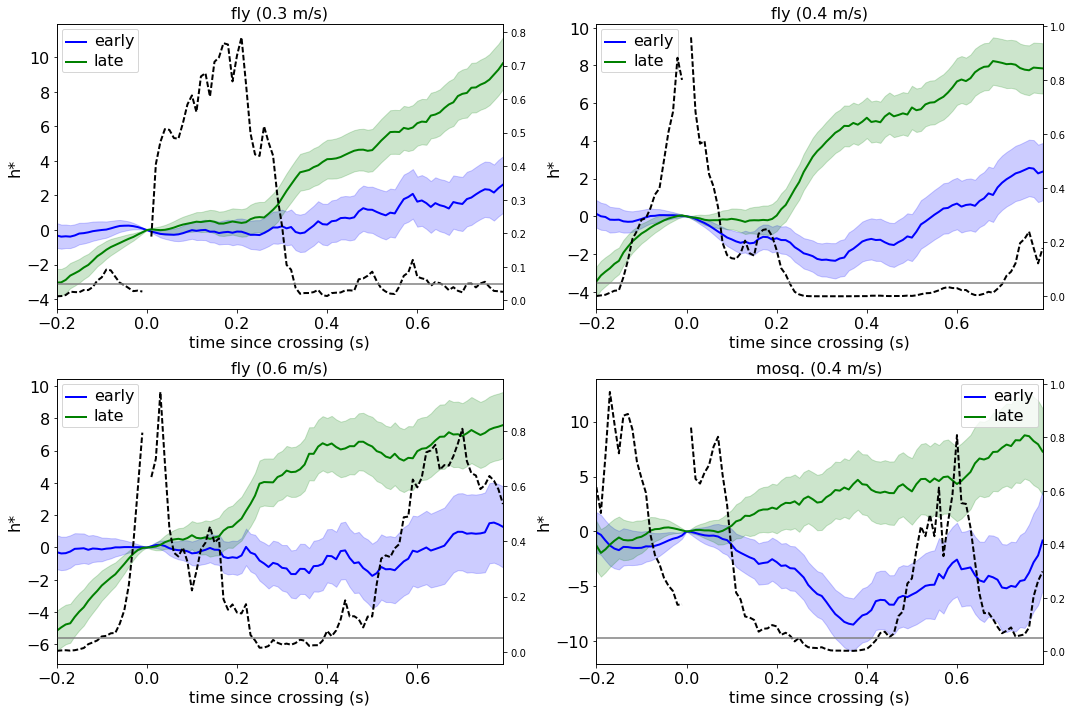

In [3]:
%matplotlib inline
from view.final_figures import per_trajectory_early_late_diff_analysis

per_trajectory_early_late_diff_analysis(
    CROSSING_GROUP_IDS=[
        'fruitfly_0.3mps_checkerboard_floor_on_th10.0_chosen0',
        'fruitfly_0.4mps_checkerboard_floor_on_th10.0_chosen0',
        'fruitfly_0.6mps_checkerboard_floor_on_th10.0_chosen0',
        'mosquito_0.4mps_checkerboard_floor_on_th430.0_chosen0',
    ],
    CROSSING_GROUP_LABELS={
        'fruitfly_0.3mps_checkerboard_floor_on_th10.0_chosen0': 'fly (0.3 m/s)',
        'fruitfly_0.4mps_checkerboard_floor_on_th10.0_chosen0': 'fly (0.4 m/s)',
        'fruitfly_0.6mps_checkerboard_floor_on_th10.0_chosen0': 'fly (0.6 m/s)',
        'mosquito_0.4mps_checkerboard_floor_on_th430.0_chosen0': 'mosq. (0.4 m/s)',
    },
    X_0_MIN=-.3,
    X_0_MAX=1.,
    H_0_MIN=0,
    H_0_MAX=180,
    CROSSING_NUMBER_MAX=5,
    MAX_CROSSINGS_EARLY=2,
    SUBTRACT_INITIAL_HEADING=True,
    T_BEFORE=0.2,
    T_AFTER=0.8,
    ADJUST_NS=True,
    SCATTER_INTEGRATION_WINDOW=[0.4, 0.5],
    AX_SIZE=(7, 5),
    AX_GRID=(2, 2),
    EARLY_LATE_COLORS={'early': 'b', 'late': 'g'},
    ALPHA=0.2,
    P_VAL_COLOR='k',
    P_VAL_Y_LIM=(0, 0.2),
    LEGEND_CROSSING_GROUP_ID='fruitfly_0.6mps_checkerboard_floor_on_th10.0_chosen0',
    FONT_SIZE=16);

### Analysis of selection bias

Here we investigate the null hypothesis that there is actually no within-fly history dependence, and that what we're instead seeing arises from the fact that there are essentially two types of flies: type A makes more upwind turns in response to odor and only crosses the trajectory a few times; type B makes more crosswind turns in response to odor and ends up crossing the trajectory many times. If this were the case the late grouping would contain only type B flies and hence exhibit more crosswind tendendcies, whereas the early grouping would contain both type A and type B flies, and hence exhibit more upwind tendencies, which is what we see in the data.

However, this hypothesis also makes the prediction that if we look only at the early crossings, and group them according to the total number of crossings in the trajectory each came from, then we'd see that "short" trajectories containing fewer crossings would have more upwind early crossing-triggered responses, and that that crossings coming from "long" trajectories with many crossings would have more crosswind early crossing-triggered responses.

We test this below by plotting the "short" group of crossings next to the "long" group of crossings. In fact, we see the opposite effect, at least in the principal epochs of interest.

LOADING DATA FOR CROSSING GROUP: "fruitfly_0.3mps_checkerboard_floor_on_th10.0_chosen0"...
CALCULATING HEADING RESIDUALS...
204 EARLY CROSSINGS IN SHORT TRAJECTORY GROUP
579 EARLY CROSSINGS IN LONG TRAJECTORY GROUP
LOADING DATA FOR CROSSING GROUP: "fruitfly_0.4mps_checkerboard_floor_on_th10.0_chosen0"...
CALCULATING HEADING RESIDUALS...
395 EARLY CROSSINGS IN SHORT TRAJECTORY GROUP
763 EARLY CROSSINGS IN LONG TRAJECTORY GROUP
LOADING DATA FOR CROSSING GROUP: "fruitfly_0.6mps_checkerboard_floor_on_th10.0_chosen0"...
CALCULATING HEADING RESIDUALS...
120 EARLY CROSSINGS IN SHORT TRAJECTORY GROUP
274 EARLY CROSSINGS IN LONG TRAJECTORY GROUP
LOADING DATA FOR CROSSING GROUP: "mosquito_0.4mps_checkerboard_floor_on_th430.0_chosen0"...
CALCULATING HEADING RESIDUALS...
35 EARLY CROSSINGS IN SHORT TRAJECTORY GROUP
90 EARLY CROSSINGS IN LONG TRAJECTORY GROUP


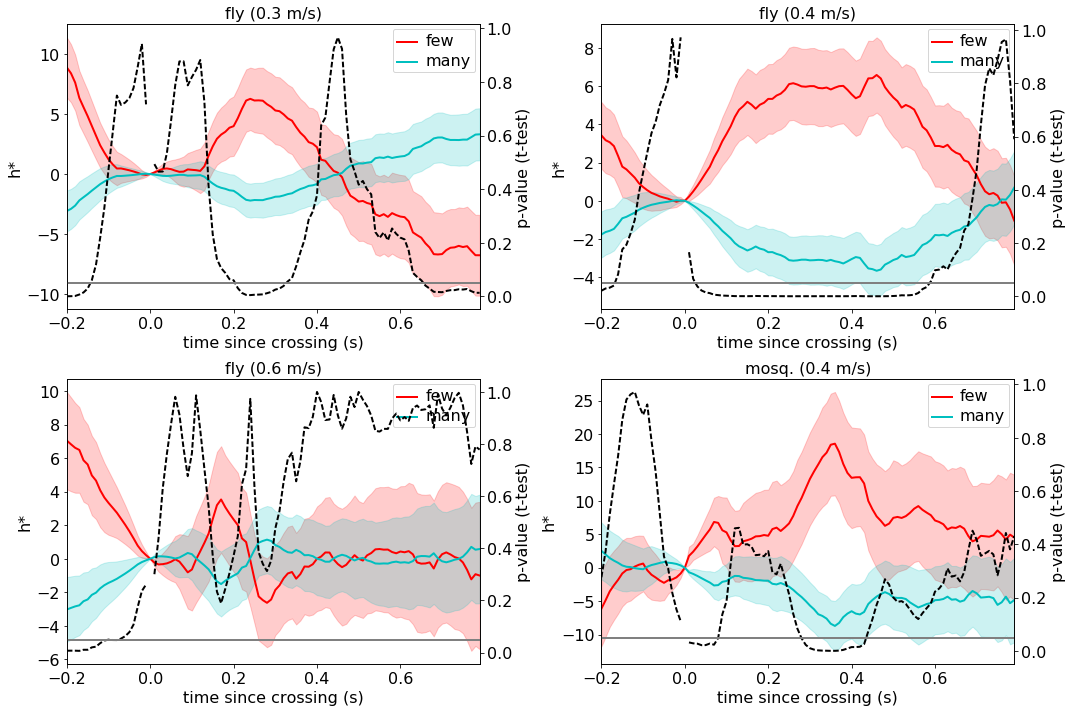

In [4]:
%matplotlib inline
from view.final_figures import early_crossings_vs_n_crossings

early_crossings_vs_n_crossings(
    CROSSING_GROUP_IDS=[
        'fruitfly_0.3mps_checkerboard_floor_on_th10.0_chosen0',
        'fruitfly_0.4mps_checkerboard_floor_on_th10.0_chosen0',
        'fruitfly_0.6mps_checkerboard_floor_on_th10.0_chosen0',
        'mosquito_0.4mps_checkerboard_floor_on_th430.0_chosen0',
    ],
    CROSSING_GROUP_LABELS={
        'fruitfly_0.3mps_checkerboard_floor_on_th10.0_chosen0': 'fly (0.3 m/s)',
        'fruitfly_0.4mps_checkerboard_floor_on_th10.0_chosen0': 'fly (0.4 m/s)',
        'fruitfly_0.6mps_checkerboard_floor_on_th10.0_chosen0': 'fly (0.6 m/s)',
        'mosquito_0.4mps_checkerboard_floor_on_th430.0_chosen0': 'mosq. (0.4 m/s)',
    },
    X_0_MIN=0.,
    X_0_MAX=0.7,
    H_0_MIN=60,
    H_0_MAX=120,
    MAX_CROSSINGS_EARLY=2,
    SUBTRACT_INITIAL_HEADING=True,
    T_BEFORE=0.2,
    T_AFTER=0.8,
    AX_GRID=(2, 2));

### Wind speed analysis

CONNECTED TO INFOTAXIS PRODUCTION DATABASE
Are you sure you want to connect to the production database [y or n]?y
14774 crossings for infotaxis crossing group: "wind_tunnel_discretized_matched_r1000_d0.08_fruitfly_0.3mps_checkerboard_floor_odor_on_th_10_hsmoothing_3"
10532 crossings for infotaxis crossing group: "wind_tunnel_discretized_matched_r1000_d0.08_fruitfly_0.4mps_checkerboard_floor_odor_on_th_10_hsmoothing_3"
1130 crossings for infotaxis crossing group: "wind_tunnel_discretized_matched_r1000_d0.08_fruitfly_0.6mps_checkerboard_floor_odor_on_th_10_hsmoothing_3"


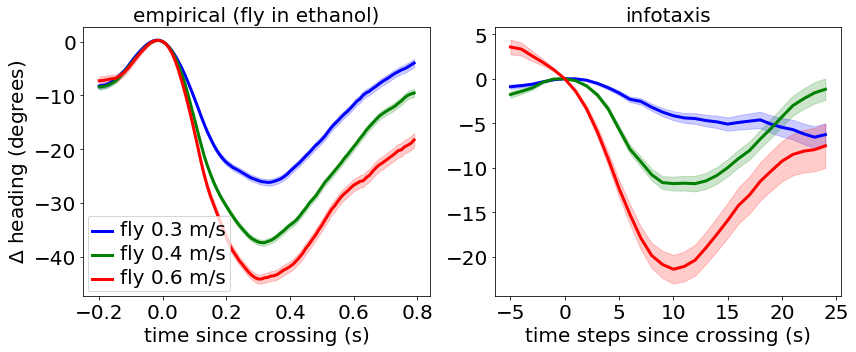

In [5]:
%matplotlib inline
import pdb
import numpy as np
from view.final_figures import infotaxis_wind_speed_dependence

f = infotaxis_wind_speed_dependence(
    WIND_TUNNEL_CG_IDS=[
        'fruitfly_0.3mps_checkerboard_floor_on_th10.0_chosen0',
        'fruitfly_0.4mps_checkerboard_floor_on_th10.0_chosen0',
        'fruitfly_0.6mps_checkerboard_floor_on_th10.0_chosen0',
        ],
    INFOTAXIS_WIND_SPEED_CG_IDS=[
        'wind_tunnel_discretized_matched_r1000_d0.08_fruitfly_0.3mps_checkerboard_floor_odor_on_th_10_hsmoothing_3',
        'wind_tunnel_discretized_matched_r1000_d0.08_fruitfly_0.4mps_checkerboard_floor_odor_on_th_10_hsmoothing_3',
        'wind_tunnel_discretized_matched_r1000_d0.08_fruitfly_0.6mps_checkerboard_floor_odor_on_th_10_hsmoothing_3',
        ],
    MAX_CROSSINGS=np.inf,
    X_0_MIN=-0.3,
    X_0_MAX=1.0,
    H_0_MIN=60,
    H_0_MAX=120,
    X_0_MIN_SIM=0,
    X_0_MAX_SIM=65,
    T_BEFORE_EXPT=0.2,
    T_AFTER_EXPT=0.8,
    TS_BEFORE_SIM=5,
    TS_AFTER_SIM=25,
    HEADING_SMOOTHING_SIM=3,
    FIG_SIZE=(12, 5),
    FONT_SIZE=20,
    EXPT_LABELS={
        'fruitfly_0.3mps_checkerboard_floor_on_th10.0_chosen0': 'fly 0.3 m/s',
        'fruitfly_0.4mps_checkerboard_floor_on_th10.0_chosen0': 'fly 0.4 m/s',
        'fruitfly_0.6mps_checkerboard_floor_on_th10.0_chosen0': 'fly 0.6 m/s',
        },
    EXPT_COLORS={
        'fruitfly_0.3mps_checkerboard_floor_on_th10.0_chosen0': 'b',
        'fruitfly_0.4mps_checkerboard_floor_on_th10.0_chosen0': 'g',
        'fruitfly_0.6mps_checkerboard_floor_on_th10.0_chosen0': 'r',
        },
    SIM_LABELS={
        'wind_tunnel_discretized_matched_r1000_d0.08_fruitfly_0.3mps_checkerboard_floor_odor_on_th_10_hsmoothing_3': 'fly 0.3 m/s',
        'wind_tunnel_discretized_matched_r1000_d0.08_fruitfly_0.4mps_checkerboard_floor_odor_on_th_10_hsmoothing_3': 'fly 0.4 m/s',
        'wind_tunnel_discretized_matched_r1000_d0.08_fruitfly_0.6mps_checkerboard_floor_odor_on_th_10_hsmoothing_3': 'fly 0.6 m/s',
        'wind_tunnel_discretized_matched_r1000_d0.08_mosquito_0.4mps_checkerboard_floor_odor_on_th_430_hsmoothing_3': 'mosq. 0.4 m/s',
    })

### Parameter dependence for centerline-inferring model

In [ ]:
%matplotlib inline
import numpy as np
from view.figures.simple_tracking_analysis import crossing_triggered_headings_early_late_vary_param

fig  = crossing_triggered_headings_early_late_vary_param(
    SEED=0,
    SAVE_FILE='simple_tracker_param_sweep_0_3_ms.npy',
    N_TRAJS=5000,
    DURATION=15, DT=0.01,
    TAU=0.457515322627,
    NOISE=2.04032021166,
    BIAS=0.235333371735,
    HIT_INFLUENCE=3,
    SQRT_K_0=5,
    VARIABLE_PARAMS=[
        {'threshold': 10, 'sqrt_k_s': 2, 'tau_memory': [np.inf, 15, 10, 5, 1]},
    ],
    BOUNDS=[(-0.3, 1), (-0.15, 0.15), (-0.15, 0.15)],
    PL_CONC=195,
    PL_MEAN=np.array([0., 0]),
    PL_STD=np.array([0.0139, 0.024]),
    H_MIN_PEAK=60, H_MAX_PEAK=120, X_MIN_PEAK=0., X_MAX_PEAK=0.7,
    EARLY_LESS_THAN=3,
    SUBTRACT_PEAK_HEADING=True, T_BEFORE=0.2, T_AFTER=1.,
    T_INT_START=0.2, T_INT_END=1., AX_GRID=(1, 2))